<a href="https://colab.research.google.com/github/barwes02/Small_LSTM_Stock_Market_Predictor_App/blob/master/Stock_Market_Predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LTSM) 
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-20')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2020-07-14,389.019989,375.510010,379.359985,388.230011,42747300.0,387.531281
2020-07-15,396.989990,385.959991,395.959991,390.899994,38299500.0,390.196472
2020-07-16,389.619995,383.619995,386.250000,386.089996,27644400.0,385.395111


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(2150, 6)

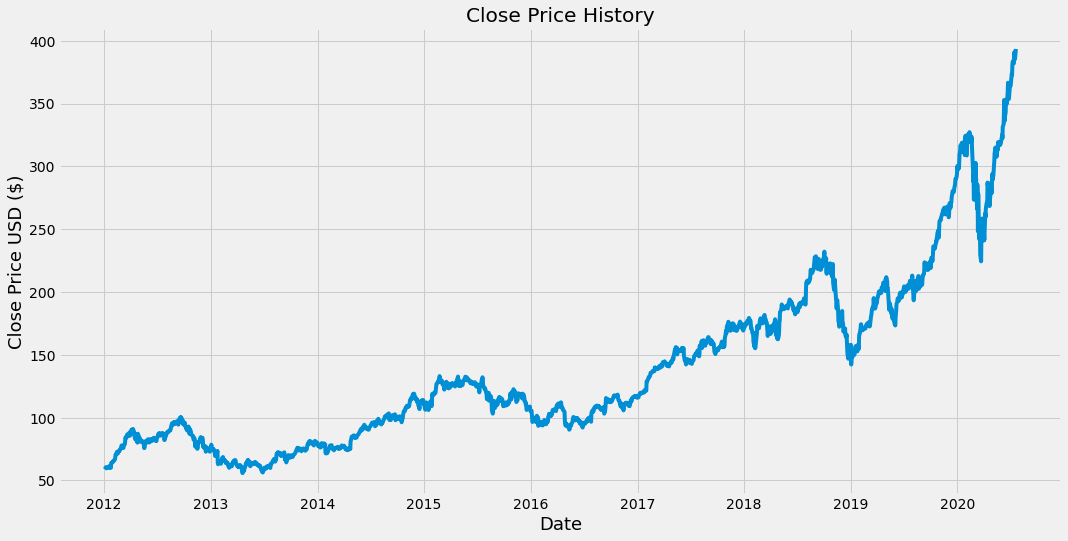

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1720

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00875827],
       [0.00969334],
       [0.01163538],
       ...,
       [0.97826088],
       [0.97595073],
       [1.        ]])

In [ ]:
#Create the training data set
#Create the scaled training set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00875827, 0.00969334, 0.01163538, 0.01348435, 0.01320087,
       0.01383976, 0.01354781, 0.01305701, 0.01238851, 0.01445749,
       0.01632339, 0.01574796, 0.01259583, 0.01560411, 0.01264237,
       0.02374887, 0.02288997, 0.02401121, 0.02643559, 0.02790376,
       0.02778106, 0.02732835, 0.0292577 , 0.03107281, 0.03312912,
       0.03645049, 0.04342749, 0.04353326, 0.04741738, 0.05031986,
       0.04533145, 0.04725235, 0.04721428, 0.05260041, 0.05183458,
       0.05325197, 0.05579907, 0.05721648, 0.06129944, 0.06427388,
       0.06513276, 0.06543318, 0.06034746, 0.05912044, 0.05930239,
       0.06408346, 0.06542895, 0.06831874, 0.07513074, 0.08421904,
       0.08251815, 0.08252237, 0.0890932 , 0.09114948, 0.08968554,
       0.08834854, 0.08695653, 0.09158105, 0.09475435, 0.0960829 ])]
[0.09279959717229741]

[array([0.00875827, 0.00969334, 0.01163538, 0.01348435, 0.01320087,
       0.01383976, 0.01354781, 0.01305701, 0.01238851, 0.01445749,
       0.01632339, 0.01574796, 0.01

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1660, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1660/1660 [==============================] - 38s 23ms/step - loss: 4.6829e-04


In [ ]:
#Create the testing data set
#create a new array containing scaled values from index 1660 to 2150
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

2.9103712924691134

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


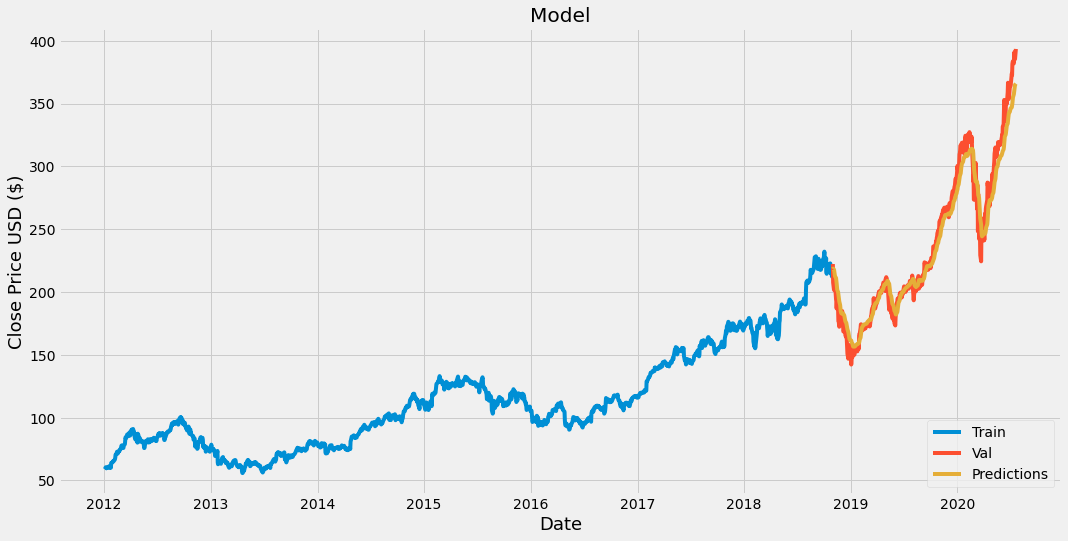

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-11-01,222.220001,218.231888
2018-11-02,207.479996,218.563583
2018-11-05,201.589996,217.801208
2018-11-06,203.770004,216.061508
2018-11-07,209.949997,214.194809
...,...,...
2020-07-14,388.230011,359.184479
2020-07-15,390.899994,361.255981
2020-07-16,386.089996,363.385864


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-20')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing prices values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[367.20566]]


In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-07-21', end='2020-07-21')
print(apple_quote2['Close'])

Date
2020-07-21    388
Name: Close, dtype: int64
